## Kutubxonalar

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from phik import phik_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, learning_curve, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.calibration import calibration_curve

import warnings
warnings.filterwarnings("ignore") # Ortiqcha warning larni berkitadi

#  Dateset bilan tanishish va uni ko'rib chiqish

In [5]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [6]:
train.head(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,...,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,...,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,...,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,...,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,...,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0


In [7]:
train.value_counts()

id     age   height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride  HDL   LDL    hemoglobin  Urine protein  serum creatinine  AST   ALT   Gtp   dental caries  smoking
14999  55.0  175.0       75.0        85.0       0.9             0.8              1.0            1.0             141.0     83.0        108.0                187.0        111.0         55.0  110.0  13.6        1.0            0.9               20.0  27.0  19.0  0.0            0.0        1
0      55.0  170.0       80.0        92.0       1.2             0.8              1.0            1.0             129.0     74.0        82.0                 175.0        58.0          49.0  114.0  15.4        1.0            0.9               20.0  23.0  13.0  0.0            0.0        1
1      30.0  170.0       80.0        94.0       1.5             1.5              1.0            1.0             128.0     84.0        95.0         

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

In [9]:
columns=[
    "age",
    "height(cm)",
    "weight(kg)",
    "waist(cm)",
    "eyesight(left)",
    "eyesight(right)",
    # "hearing(left)",
    # "hearing(right)",
    "systolic",
    "relaxation",
    "fasting blood sugar",
    "Cholesterol",
    "triglyceride",
    "HDL",
    "LDL",
    "hemoglobin",
    # "Urine protein",
    "serum creatinine",
    "AST",
    "ALT",
    "Gtp",
    "dental caries"
]
X = train[columns]
y = train['smoking']


In [10]:
train[columns].corr()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries
age,1.000000,-0.489060,-0.324329,-0.034842,-0.354086,-0.350489,0.126487,0.068520,0.174922,0.179284,0.019275,0.035509,0.166660,-0.276232,-0.209206,0.120473,-0.085207,-0.028772,-0.108703
height(cm),-0.489060,1.000000,0.717036,0.438940,0.268237,0.267593,0.142070,0.167407,0.046621,-0.106021,0.252003,-0.308854,-0.055459,0.627776,0.544857,0.079000,0.289523,0.283350,0.118763
weight(kg),-0.324329,0.717036,1.000000,0.825413,0.202310,0.197314,0.328412,0.330886,0.168826,0.038466,0.415135,-0.428095,0.094732,0.568848,0.474629,0.206830,0.469154,0.392769,0.109541
waist(cm),-0.034842,0.438940,0.825413,1.000000,0.070780,0.062995,0.369376,0.351661,0.231402,0.117263,0.434590,-0.433371,0.175521,0.448312,0.344824,0.257397,0.463373,0.399473,0.073551
eyesight(left),-0.354086,0.268237,0.202310,0.070780,1.000000,0.674314,-0.016843,0.011748,-0.044956,-0.045358,0.045554,-0.042871,-0.047291,0.155087,0.133605,-0.032523,0.080227,0.058225,0.038897
eyesight(right),-0.350489,0.267593,0.197314,0.062995,0.674314,1.000000,-0.016769,0.016449,-0.042065,-0.042686,0.060785,-0.046681,-0.050737,0.163083,0.128879,-0.027073,0.084492,0.065291,0.047001
systolic,0.126487,0.142070,0.328412,0.369376,-0.016843,-0.016769,1.000000,0.768032,0.200823,0.091815,0.234055,-0.157250,0.078022,0.246856,0.126287,0.167147,0.213870,0.236028,0.033124
relaxation,0.068520,0.167407,0.330886,0.351661,0.011748,0.016449,0.768032,1.000000,0.186864,0.112428,0.248995,-0.160183,0.095171,0.273994,0.149540,0.150851,0.216551,0.250908,0.029528
fasting blood sugar,0.174922,0.046621,0.168826,0.231402,-0.044956,-0.042065,0.200823,0.186864,1.000000,0.099383,0.242274,-0.132326,0.066552,0.113815,0.073567,0.109121,0.167451,0.222505,0.021537
Cholesterol,0.179284,-0.106021,0.038466,0.117263,-0.045358,-0.042686,0.091815,0.112428,0.099383,1.000000,0.280392,0.169411,0.857654,0.017980,-0.005854,0.152888,0.157290,0.152539,-0.014125


In [11]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
auc_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]  
    auc = roc_auc_score(y_test, y_scores)
    auc_scores.append(auc)
average_auc = sum(auc_scores) / len(auc_scores)
print(f"O'rtacha ROC AUC: {average_auc}")

O'rtacha ROC AUC: 0.8541078963204773


# WOE

In [112]:
# def WoE(data, feature_name):
    # df = data.copy()
    
    # woe_table = df.groupby(feature_name)['smoking'].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})
    
    # woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
    # woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    
    # woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    
    # woe_table['Total Observations'] = woe_table['# of events'] + woe_table['# of non-events']
    # woe_table['Percent of Observations'] = (woe_table['Total Observations'] / woe_table['Total Observations'].sum() * 100).round(3)

    # return woe_table.reset_index()

In [113]:
# # def print_WoE(df_woe, col, rotation=45):
#     fig, ax1 = plt.subplots(figsize=(10, 6))
#     ax2 = ax1.twinx()

#     sns.pointplot(data=df_woe, x=col, y='WoE', color='red', linewidth=2, ax=ax1)
#     ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
#     ax1.tick_params(axis='y', colors='red')
#     ax1.set_xlabel(col)

#     ax1.grid(visible=True, which='major', linestyle='--')

#     sns.barplot(data=df_woe, x=col, y='Percent of Observations', alpha=0.3, ax=ax2)
#     ax2.set_ylabel('Rate of Observations')
#     ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)
#     ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)

#     ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rotation)
#     plt.title("WoE change plot")
#     plt.show()

In [217]:
# train['hemoglobin_column'] = pd.cut(train['hemoglobin'], bins=[11.9, 13.05, 14, 15,16, np.inf])
# df_woe = WoE(train, 'hemoglobin_column')
# df_woe


smoking,hemoglobin_column,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(11.9, 13.05]",1989,40,0.007228,0.220486,-3.417864,2029,13.940
1,"(13.05, 14.0]",2810,246,0.044452,0.311495,-1.946964,3056,20.996
2,"(14.0, 15.0]",1878,1467,0.265089,0.208181,0.241656,3345,22.982
3,"(15.0, 16.0]",1765,2616,0.472714,0.195655,0.882140,4381,30.100
4,"(16.0, inf]",579,1165,0.210517,0.064184,1.187818,1744,11.982


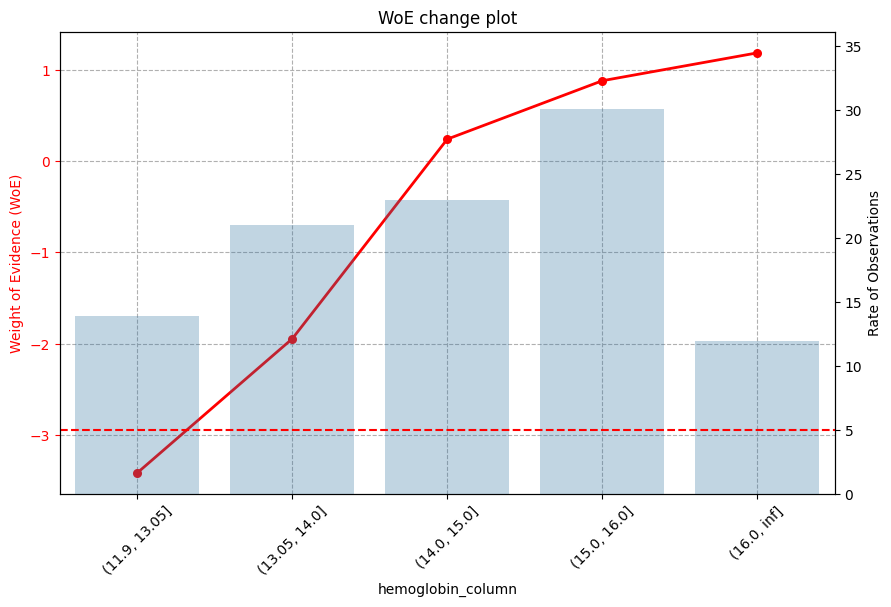

In [218]:
# print_WoE(df_woe, 'hemoglobin_column')

In [219]:
# train['hemoglobin_column'] = train['hemoglobin_column'].cat.codes + 1 # tartib raqamlarini qiymat sifatida beryabman, juda qulay usul

# test['hemoglobin_column'] = pd.cut(test['hemoglobin'], bins=[ 11.9, 13.05, 14, 15,16, np.inf])
# test['hemoglobin_column'] = test['hemoglobin_column'].cat.codes + 1

In [220]:
# train['age_column'] = pd.cut(train['age'], bins=[30,  39.5, 44, 49, 55,  85])
# df_woe = WoE(train, 'age_column')
# df_woe


smoking,age_column,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(30.0, 39.5]",469,714,0.164782,0.056249,1.074843,1183,9.336
1,"(39.5, 44.0]",3541,1936,0.446804,0.424682,0.050778,5477,43.225
2,"(44.0, 49.0]",1246,579,0.133626,0.149436,-0.111828,1825,14.403
3,"(49.0, 55.0]",1730,667,0.153935,0.207484,-0.298523,2397,18.917
4,"(55.0, 85.0]",1352,437,0.100854,0.162149,-0.474844,1789,14.119


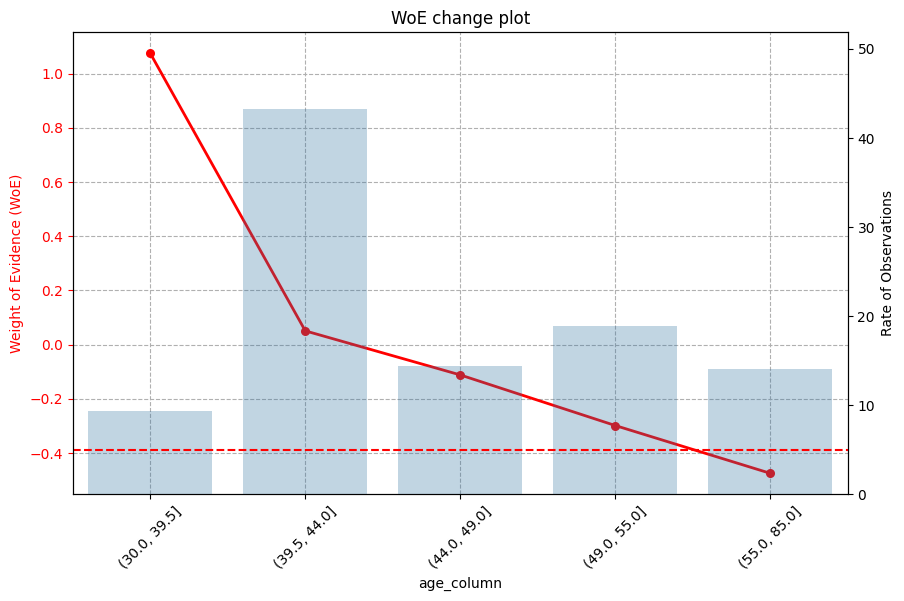

In [221]:
# print_WoE(df_woe, 'age_column')

In [222]:
# train['age_column'] = train['age_column'].cat.codes + 1 # tartib raqamlarini qiymat sifatida beryabman, juda qulay usul

# test['age_column'] = pd.cut(test['age'], bins=[30,  39.5, 44, 49, 55, np.inf])
# test['age_column'] = test['age_column'].cat.codes + 1

In [213]:
# train['height(cm)_column'] = pd.cut(train['height(cm)'], bins=[150, 155, 160, 165, 170, 195])
# df_woe = WoE(train, 'height(cm)_column')
# df_woe


smoking,height(cm)_column,# of non-events,# of events,Percentage events,Percentage non-events,WoE,Total Observations,Percent of Observations
0,"(150, 155]",2329,83,0.015044,0.282132,-2.931369,2412,17.514
1,"(155, 160]",2094,316,0.057278,0.253664,-1.488104,2410,17.499
2,"(160, 165]",1415,1230,0.222947,0.171411,0.262869,2645,19.206
3,"(165, 170]",1306,2002,0.362878,0.158207,0.830162,3308,24.020
4,"(170, 195]",1111,1886,0.341852,0.134585,0.932183,2997,21.762


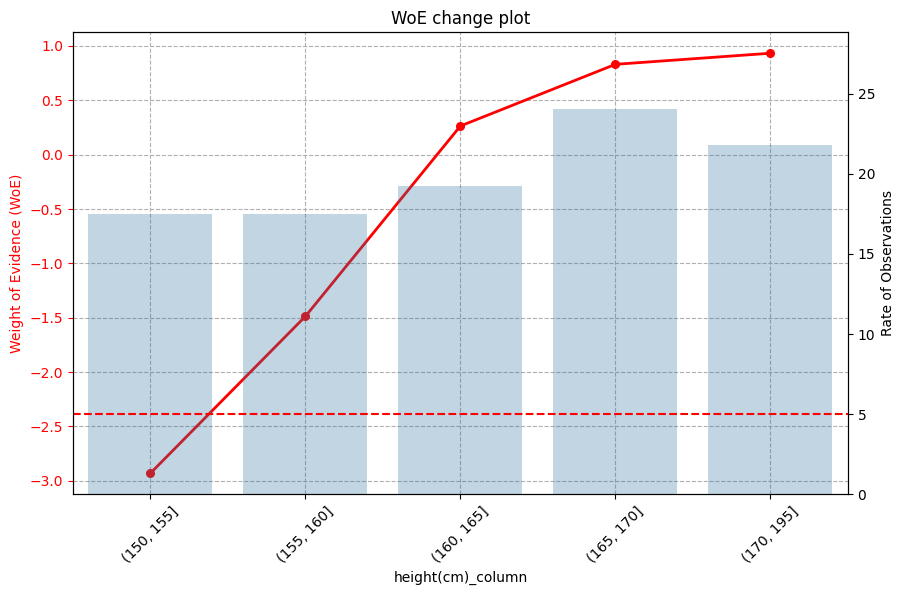

In [214]:
# print_WoE(df_woe, 'height(cm)_column')

In [ ]:
# train['height(cm)_column'] = train['height(cm)_column'].cat.codes + 1 # tartib raqamlarini qiymat sifatida beryabman, juda qulay usul

# test['height(cm)_column'] = pd.cut(test['age'], bins=[ 11.9, 13.05, 14, 15,16, np.inf])
# test['height(cm)_column'] = test['height(cm)_column'].cat.codes + 1

# Optuna

In [307]:
import optuna
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to search
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 2, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # Create the model with suggested hyperparameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    # Evaluate using cross-validation (with ROC-AUC as scoring metric)
    roc_auc = cross_val_score(rf, X_train, y_train, cv=3, scoring="roc_auc", n_jobs=-1).mean()
    
    return roc_auc

# Create and run an Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)


[I 2024-10-27 20:10:10,310] A new study created in memory with name: no-name-c37ab969-5269-42ed-a704-40871bcb47c9


[I 2024-10-27 20:10:16,565] Trial 0 finished with value: 0.8824364586581422 and parameters: {'n_estimators': 401, 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.8824364586581422.
[I 2024-10-27 20:10:19,458] Trial 1 finished with value: 0.8754758462548468 and parameters: {'n_estimators': 53, 'max_depth': 37, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.8824364586581422.
[I 2024-10-27 20:10:22,134] Trial 2 finished with value: 0.8812854619663244 and parameters: {'n_estimators': 106, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8824364586581422.
[I 2024-10-27 20:10:31,440] Trial 3 finished with value: 0.8778774970493877 and parameters: {'n_estimators': 413, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_featur

In [308]:
columns=[
    "age",
    # "age_column",
    "height(cm)",
    "weight(kg)",
    "waist(cm)",
    "eyesight(left)",
    "eyesight(right)",
    # "hearing(left)",
    # "hearing(right)",
    "systolic",
    "relaxation",
    "fasting blood sugar",
    "Cholesterol",
    "triglyceride",
    "HDL",
    "LDL",
    "hemoglobin",
    # "hemoglobin_column",
    # "Urine protein",
    "serum creatinine",
    "AST",
    "ALT",
    "Gtp",
    "dental caries"
]
X = train[columns]
y = train['smoking']

In [19]:
skf = StratifiedKFold(n_splits=5)

In [26]:
train_sizes, train_scores, val_scores =learning_curve(
    model, X_train, y_train, cv=skf, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1, 10)
)

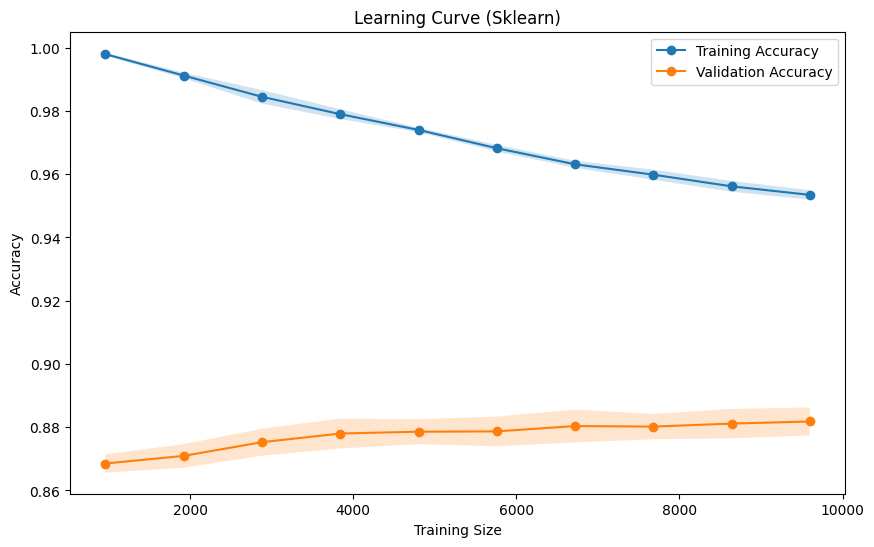

In [27]:
# Calculate mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Sklearn)')
plt.legend(loc='best')
plt.show()



In [22]:
y_prob = model.predict_proba(X_test)[:, 1]

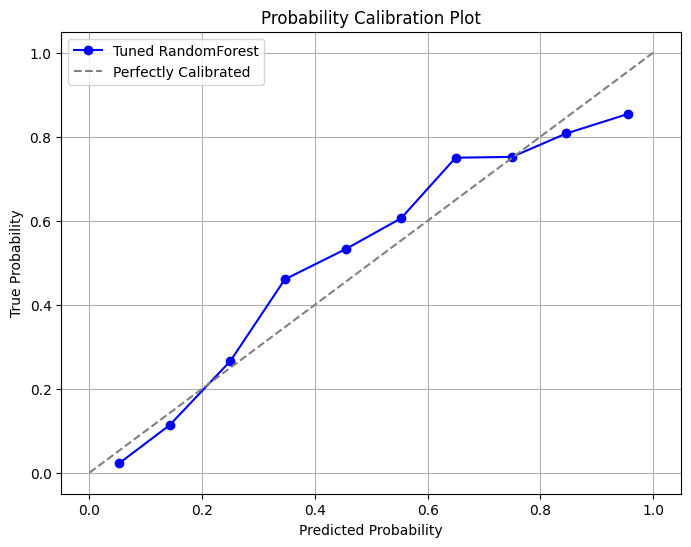

In [13]:
# Compute calibration curve (true probabilities vs predicted probabilities)

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plotting the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Tuned RandomForest', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated', color='gray')

plt.title('Probability Calibration Plot')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend(loc='best')
plt.grid()
plt.show()


# Model uchun kerakli parametrlarni qidrish

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=["gini", "entropy", "log_loss"]
roc=[]

for crit in lst:
    model =RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=4, max_samples=0.791, criterion=crit)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc.append(roc_auc)
    
for i in range(3):
    if max(roc)==roc[i]:
        Lit=lst[i]
print("Train-test split orqali ROC AUC:", max(roc), Lit)

Train-test split orqali ROC AUC: 0.8849588726961402 entropy


In [ ]:
roc=[]
k_roc=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range(1, 10):
    k=i/1000
    model =RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=4, max_samples=k, criterion=Lit, random_state=42)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc.append(roc_auc)
    k_roc.append(k) 
for i in range(9):
    if max(roc)==roc[i]:
        k=k_roc[i]   
print("Train-test split orqali ROC AUC:", max(roc), k)


# 0.8808482779305933, (1, 100), k=0.089
# 0.8829860339914841, (100, 200), k=0,158
# 0.8835560073579243, (200, 300), k=0.25
# 0.8859312918700252, k=0.372, (300, 400)
# 0.8835607531811254, (400, 500), k=0.486
# 0.8832100368465714, (500, 600),  k=0.501

## max_samples ning eng yaxshi qiymati aniqlandi

# WOE dan keyin
# 0.8829148466434691, (1, 100), k=0.088
# 0.8848872107658051, (100, 200), k=0.164
#  0.8857452556005461, (200, 300), k=0.239
#  0.8862710928112169, (300, 400), k= 0.33
#  0.8858805115617744, (400, 500), k=0.494
#  0.8858999694368986, (500, 600), k=0.588
# umumiy 
# (1, 1000), 0.8871533413442829, k=0.791

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=["gini", "entropy", "log_loss"]
roc=[]

for crit in lst:
    model =RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=4, max_samples=0.791, criterion=crit)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc.append(roc_auc)
for i in range(3):
    if max(roc)==roc[i]:
        Lit=lst[i]
print("Train-test split orqali ROC AUC:", max(roc), Lit)

Train-test split orqali ROC AUC: 0.885332843564379 gini


In [3]:





# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest for pipeline
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=220, max_depth=16, min_samples_split=5, min_samples_leaf=6, max_features='log2', bootstrap=False))
])

# Logistic Regression for pipeline
lr_pipeline = Pipeline([
    ('lr', LogisticRegression(max_iter=200))
])

# Create the StackingClassifier
stacking_model = StackingClassifier(
    estimators=[
        ('rf_pipeline', rf_pipeline),
        ('lr_pipeline', lr_pipeline)
    ],
    final_estimator=LogisticRegression()
)

# Train the model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the results
accuracy = accuracy_score(y_test, y_pred)
print(f'Modelning aniqligi: {accuracy:.2f}')

Modelning aniqligi: 1.00


# Modelni ishlatish va saqlash

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model =RandomForestClassifier(max_depth=10, max_features=6, min_samples_split=4, min_samples_leaf=8 ,max_samples=0.791, criterion=Lit, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)
# 0.8858915865087511


0.8852850634510925


In [325]:
model.fit(X, y)
y_pred_final = model.predict_proba(test[columns])[:, 1]
sub = pd.read_csv('sample_submission.csv')
sub['smoking'] = y_pred_final
sub.to_csv('Sample.csv', index=False)
sub

,id,smoking
0,15000,0.756628
1,15001,0.009402
2,15002,0.007722
3,15003,0.057724
4,15004,0.521718
...,...,...
9995,24995,0.331689
9996,24996,0.807019
9997,24997,0.169061
9998,24998,0.006125
